<a href="https://colab.research.google.com/github/Umadeviganti/Data_Science/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.8 MB/s eta 0:00:00


**1. Milestone 1: [ Score: 40 points]**

‣ Input: Context and Dataset

‣ Process:

‣ Step 1: Import the data. [ 3 points ]

‣ Step 2: Map training and testing images to its classes. [ 4 points ]

‣ Step 3: Map training and testing images to its annotations. [ 4 points ]

‣ Step 4: Preprocessing and Visualisation of different classes [4 Points]

‣ Step 5: Display images with bounding box. [ 5 points ]

‣ Step 6: Design, train and test basic CNN models for classification. [ 10 points ]

‣ Step 7: Interim report [ 10 points ]

 **Step 1:** Import the data. [ 3 points ]

In [3]:
import zipfile  #Use the zipfile module to open and read the zip file.
import os       #to interact with the operating system
import pydicom
import numpy as np
import pandas as pd
import cv2
import gc  # Garbage collection for memory management
import traceback  # For detailed error traceback
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [4]:
class_info=pd.read_csv("/content/drive/MyDrive/Capstone Project/stage_2_detailed_class_info.csv")
train_labels=pd.read_csv("/content/drive/MyDrive/Capstone Project/stage_2_train_labels.csv")

In [5]:
# Display the first few rows of each DataFrame
print("Class Info:")
print(class_info.head())

Class Info:
                              patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity


In [6]:
print("\nTrain Labels:")
print(train_labels.head())


Train Labels:
                              patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1


In [7]:
# Check the shape of the DataFrames
print(f"Class Info shape: {class_info.shape}")
print(f"Train Labels shape: {train_labels.shape}")

Class Info shape: (30227, 2)
Train Labels shape: (30227, 6)


In [8]:
# Basic information about the class info data
print("\nClass Info DataFrame Info:")
print(class_info.info())


Class Info DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB
None


In [9]:
# Basic information about the train labels data
print("\nTrain Labels DataFrame Info:")
print(train_labels.info())


Train Labels DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB
None


In [10]:
# Summary statistics
print("\nSummary Statistics for Train Labels:")
print(train_labels.describe())


Summary Statistics for Train Labels:
                 x            y        width       height        Target
count  9555.000000  9555.000000  9555.000000  9555.000000  30227.000000
mean    394.047724   366.839560   218.471376   329.269702      0.316108
std     204.574172   148.940488    59.289475   157.750755      0.464963
min       2.000000     2.000000    40.000000    45.000000      0.000000
25%     207.000000   249.000000   177.000000   203.000000      0.000000
50%     324.000000   365.000000   217.000000   298.000000      0.000000
75%     594.000000   478.500000   259.000000   438.000000      1.000000
max     835.000000   881.000000   528.000000   942.000000      1.000000


**Insight into the summary statistics for train labels:**
**Count:**
There are 9,555 entries for the x, y, width, and height columns, which represent image bounding box coordinates and dimensions.

The Target column has a total of 30,227 entries, indicating the presence of multiple targets or objects per image or might be missing values in x,y,width and heigh columns.

**Mean and Standard Deviation:**

The average x and y coordinates are approximately 394 and 367, respectively, with a relatively high standard deviation, suggesting a wide distribution of bounding box positions across the images.

The width and height have means of around 218 and 329, respectively, indicating that the bounding boxes tend to be rectangular, with the height generally larger than the width.

The Target column mean is 0.316, showing that around 31.6% of the labels correspond to the positive class (1), highlighting class imbalance in the dataset.

**Distribution:**

The minimum and maximum values for x, y, width, and height show the range of possible values, with x ranging from 2 to 835, y from 2 to 881, width from 40 to 528, and height from 45 to 942.

The Target column ranges from 0 to 1, indicating binary classification.

**Quartiles:**

For x and y, the 25th, 50th (median), and 75th percentiles suggest that most bounding boxes are positioned centrally in the images, as the median values are around the image center.

The width and height quartiles show that most bounding boxes are between 177-259 for width and 203-438 for height, indicating some variability in object size.

The 75th percentile for the Target column is 1.0, reinforcing the imbalance, as only the top 25% have a positive target.

**Conclusion**

Overall, these statistics suggest that the dataset may require additional balancing techniques, such as resampling or augmentation, to improve model performance on the minority class. Additionally, the distribution of bounding box dimensions and positions should be considered during model training to ensure robust detection across various object sizes and locations.

In [11]:
# Check for missing values in class info
print("\nMissing values in class_info:")
print(class_info.isnull().sum())



Missing values in class_info:
patientId    0
class        0
dtype: int64


In [12]:
# Check for missing values in train labels
print("\nMissing values in train_labels:")
print(train_labels.isnull().sum())
print("\nMissing values percentages in train_labels:")
print(train_labels.isnull().mean()*100)


Missing values in train_labels:
patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

Missing values percentages in train_labels:
patientId     0.000000
x            68.389188
y            68.389188
width        68.389188
height       68.389188
Target        0.000000
dtype: float64


**Significant Missing Data in Bounding Boxes:**
*   68% of dataset lacks bounding box annotations.
*   The absence of bounding box data likely corresponds to the Target value being 0, indicating the absence of the object of interest in those images.
*   As the primary goal is classification (0 vs. 1), so the missing bounding boxes can be ignored for class 0, focusing on the target variable.
*   We can consider using techniques like resampling, synthetic data generation, or weighting to address class imbalance.

Addressing this imbalance and using appropriate strategies for handling missing data will be key to effective modeling.





In [13]:
# Group by Target and count missing values
missing_values_by_target = train_labels.groupby('Target').apply(lambda df: df.isnull().sum())
print("\nMissing values by Target:")
print(missing_values_by_target)


Missing values by Target:
        patientId      x      y  width  height  Target
Target                                                
0               0  20672  20672  20672   20672       0
1               0      0      0      0       0       0


In [14]:
# Distribution of classes in class_info
print("\nClass distribution in class_info:")
print(class_info['class'].value_counts())


Class distribution in class_info:
class
No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: count, dtype: int64


In [15]:
# Distribution of target labels in train_labels
print("\nTarget distribution in train_labels:")
print(train_labels['Target'].value_counts())


Target distribution in train_labels:
Target
0    20672
1     9555
Name: count, dtype: int64


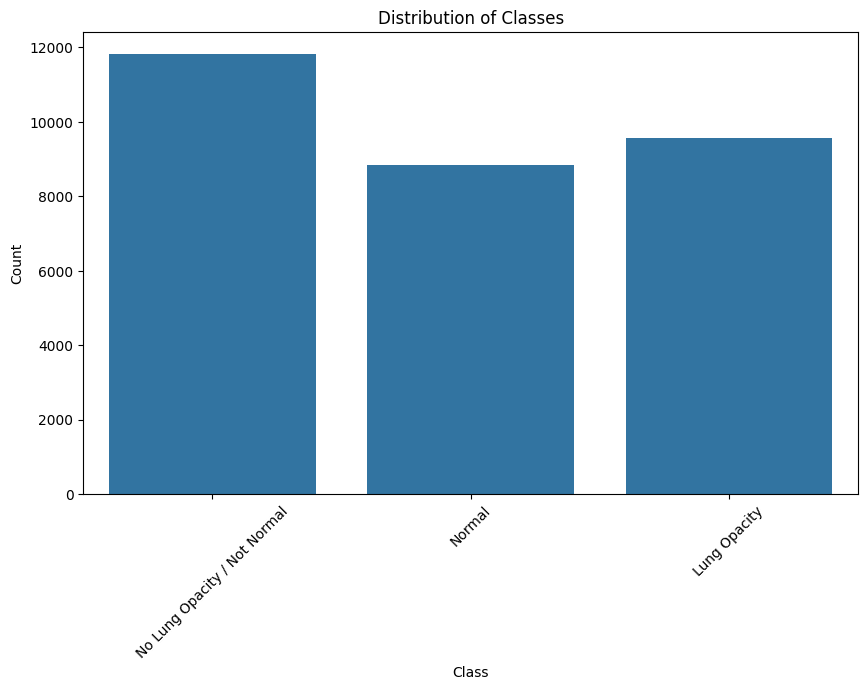

In [16]:
# Distribution of classes
plt.figure(figsize=(10, 6))
sns.countplot(data=class_info, x='class')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The dataset is somewhat imbalanced, with the "No Lung Opacity / Not Normal" class being the largest group.we can consider techniques like resampling or class weighting to address the class imbalance in model training.

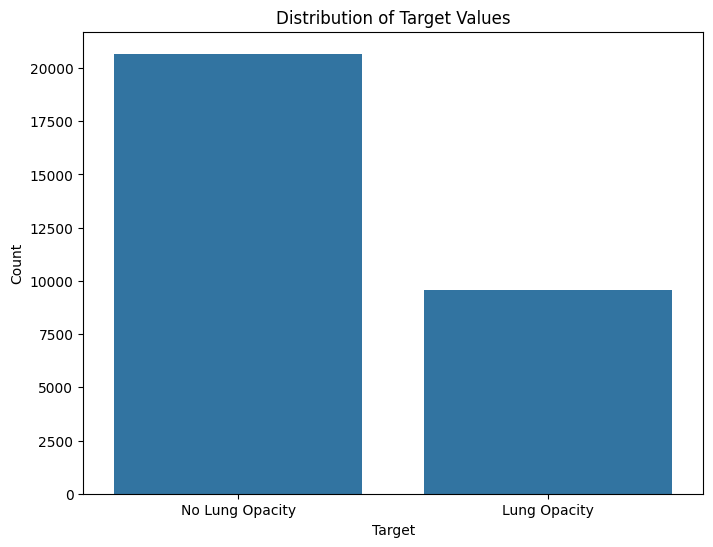

In [17]:
# Distribution of target values
plt.figure(figsize=(8, 6))
sns.countplot(data=train_labels, x='Target')
plt.title('Distribution of Target Values')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Lung Opacity', 'Lung Opacity'])
plt.show()


The dataset is imbalanced, with significantly more samples for class 0 compared to class 1.We can use resampling or class weighting strategies to improve model performance on the minority class (class 1).

In [18]:
# Merge the DataFrames on 'patientId'
merged_df = pd.merge(train_labels, class_info, on='patientId')

In [19]:
# Check the merged DataFrame
print(merged_df.head())

                              patientId      x      y  width  height  Target  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0   
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0   
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0   
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0   
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   

                          class  
0  No Lung Opacity / Not Normal  
1  No Lung Opacity / Not Normal  
2  No Lung Opacity / Not Normal  
3                        Normal  
4                  Lung Opacity  


In [20]:
def extract_dicom_from_zip(zip_file_path, extraction_path):
    """
    Extract DICOM (.dcm) files from a zip archive, ignoring the __MACOSX folder.

    Parameters:
    - zip_file_path: Path to the zip file.
    - extraction_path: Path to the directory where files should be extracted.

    Returns:
    - A list of DICOM file paths.
    """
    dicom_files = []

    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            for file_info in zip_ref.infolist():
                file_name = file_info.filename

                # Ignore __MACOSX folders
                if '__MACOSX' in file_name:
                    continue

                # Check if the file is a DICOM image
                if file_name.lower().endswith('.dcm'):
                    file_path = os.path.join(extraction_path, file_name)

                    # Ensure the directory structure is created
                    if file_info.is_dir():
                        os.makedirs(file_path, exist_ok=True)
                    else:
                        zip_ref.extract(file_info, extraction_path)
                        dicom_files.append(file_path)

                        print(f"Extracted DICOM file: {file_name}")

    except zipfile.BadZipFile as e:
        print(f"Error: Bad zip file {zip_file_path}. Details: {str(e)}")
    except Exception as e:
        print(f"Unexpected error during extraction: {str(e)}")
        traceback.print_exc()

    return dicom_files

In [21]:
def load_dicom_image(file_path):
    """
    Load a DICOM image and convert it to a NumPy array.

    Parameters:
    - file_path: Path to the DICOM file.

    Returns:
    - A tuple containing the file path and the DICOM image data as a NumPy array.
    """
    try:
        dicom_image = pydicom.dcmread(file_path)

        # Convert DICOM image to a NumPy array
        image_array = dicom_image.pixel_array

        # Normalize the image to range 0-255
        image_array = cv2.normalize(image_array, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        return file_path, image_array
    except Exception as e:
        print(f"Failed to load DICOM file {file_path}. Error: {str(e)}")
        traceback.print_exc()
        return file_path, None


In [22]:
def list_extracted_files(extraction_path):
    """
    List all the DICOM files in the extraction directory.

    Parameters:
    - extraction_path: Path to the directory where files are extracted.

    Returns:
    - List of DICOM file paths.
    """
    dicom_files = []

    for root, dirs, files in os.walk(extraction_path):
        for file in files:
            if file.lower().endswith('.dcm'):
                dicom_files.append(os.path.join(root, file))

    return dicom_files

In [23]:
def display_images(image_tuples, title="Images"):
    """
    Display a list of images.

    Parameters:
    - image_tuples: List of tuples, where each tuple contains a file path and a NumPy array of the image.
    - title: Title for the image display.
    """
    fig, axs = plt.subplots(1, len(image_tuples), figsize=(15, 5))
    fig.suptitle(title)

    for i, (file_path, image_array) in enumerate(image_tuples):
        if image_array is not None:
            axs[i].imshow(image_array, cmap='gray')
            axs[i].set_title(os.path.basename(file_path))
            axs[i].axis('off')
        else:
            axs[i].text(0.5, 0.5, 'Error', fontsize=12, ha='center')

    plt.show()

In [24]:
train_zip_file_path = '/content/drive/MyDrive/Capstone Project/stage_2_train_images.zip'
test_zip_file_path = '/content/drive/MyDrive/Capstone Project/stage_2_test_images.zip'

In [25]:
# Define the paths
train_extraction_path = '/content/path/to/extracted/train_images/stage_2_train_images'
test_extraction_path = '/content/path/to/extracted/test_images'

In [26]:
# Ensure directories exist
os.makedirs(train_extraction_path, exist_ok=True)
os.makedirs(test_extraction_path, exist_ok=True)

In [27]:
# Extract DICOM files
train_dicom_files = extract_dicom_from_zip(train_zip_file_path, train_extraction_path)
test_dicom_files = extract_dicom_from_zip(test_zip_file_path, test_extraction_path)

Streaming output truncated to the last 5000 lines.
Extracted DICOM file: stage_2_train_images/b329ead1-3d20-43af-b0d9-bc4e98ec2239.dcm
Extracted DICOM file: stage_2_train_images/5cc6b134-74ea-4443-b2f2-9e6d81d2010b.dcm
Extracted DICOM file: stage_2_train_images/9fb4b913-c36b-4de9-abba-518897e49e94.dcm
Extracted DICOM file: stage_2_train_images/610ea636-e9df-4a9b-a396-867c06d10cb1.dcm
Extracted DICOM file: stage_2_train_images/3360d5d9-e1b5-448f-87a4-df15eed8a095.dcm
Extracted DICOM file: stage_2_train_images/e5f10650-f97d-4671-9954-7a579b593ea9.dcm
Extracted DICOM file: stage_2_train_images/42da1a6f-7984-4d82-b10a-603b8e3724c5.dcm
Extracted DICOM file: stage_2_train_images/a3407a92-03ba-4ec2-9373-845bda60ea7b.dcm
Extracted DICOM file: stage_2_train_images/95fa653c-bcbf-44ea-8749-f764594e9b7f.dcm
Extracted DICOM file: stage_2_train_images/694c58e8-4cc3-43ff-af14-11c5216b0c14.dcm
Extracted DICOM file: stage_2_train_images/6829b50e-6124-4b09-bbb4-7f2d18b1fd4b.dcm
Extracted DICOM file: sta

In [28]:
# List and print the extracted DICOM files
train_dicom_files = list_extracted_files(train_extraction_path)
test_dicom_files = list_extracted_files(test_extraction_path)

print(f"Number of train DICOM files: {len(train_dicom_files)}")
print(f"Number of test DICOM files: {len(test_dicom_files)}")

Number of train DICOM files: 26684
Number of test DICOM files: 3000


In [29]:
# Load a few sample images
sample_train_images = [load_dicom_image(f) for f in train_dicom_files[:3]]
sample_test_images = [load_dicom_image(f) for f in test_dicom_files[:3]]

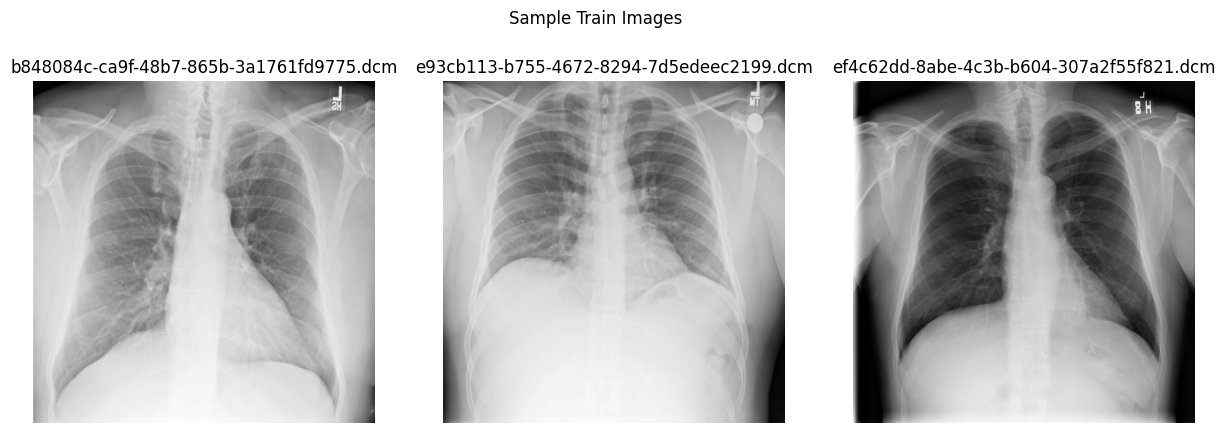

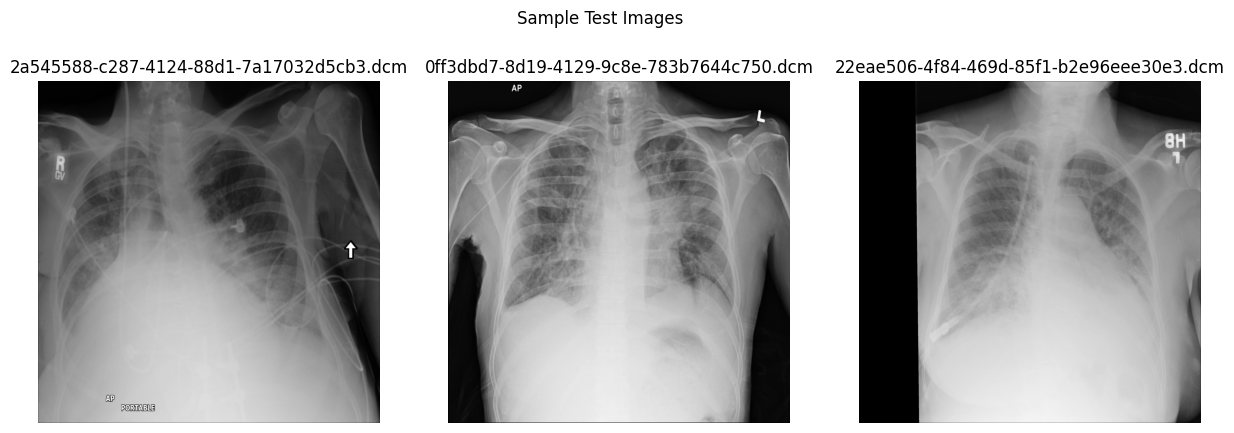

In [30]:
# Display the sample images
display_images(sample_train_images, title="Sample Train Images")
display_images(sample_test_images, title="Sample Test Images")

In [31]:
# Function to load DICOM images and extract basic information
def load_dicom_info(extraction_path):
    dicom_info = []
    for root, _, files in os.walk(extraction_path):
        for file in files:
            if file.lower().endswith('.dcm'):
                file_path = os.path.join(root, file)
                try:
                    dicom_image = pydicom.dcmread(file_path)
                    image_data = {
                        'file_path': file_path,
                        'patient_id': dicom_image.PatientID,
                        'width': dicom_image.Columns,
                        'height': dicom_image.Rows,
                        'modality': dicom_image.Modality,
                        'pixel_spacing': dicom_image.PixelSpacing,
                        'bits_stored': dicom_image.BitsStored,
                        'image_position': dicom_image.ImagePositionPatient if 'ImagePositionPatient' in dicom_image else None
                    }
                    dicom_info.append(image_data)
                except Exception as e:
                    print(f"Failed to read DICOM file {file_path}: {str(e)}")
    return pd.DataFrame(dicom_info)

In [32]:
# Load DICOM info for train and test sets
train_dicom_info = load_dicom_info(train_extraction_path)
test_dicom_info = load_dicom_info(test_extraction_path)

In [33]:
# 1. Basic Information
print(f"Number of train images: {len(train_dicom_info)}")
print(f"Number of test images: {len(test_dicom_info)}")
print(f"Unique patient IDs in train set: {train_dicom_info['patient_id'].nunique()}")
print(f"Unique patient IDs in test set: {test_dicom_info['patient_id'].nunique()}")

Number of train images: 26684
Number of test images: 3000
Unique patient IDs in train set: 26684
Unique patient IDs in test set: 3000


In [34]:
print(f"Number of merged files: {len(merged_df)}")

Number of merged files: 37629


In [35]:
# Check for duplicate patient IDs
duplicate_patient_ids = merged_df[merged_df.duplicated('patientId', keep=False)]
print(f"Number of duplicate patient IDs: {len(duplicate_patient_ids)}")

Number of duplicate patient IDs: 14343


In [36]:
# Group by patient_id to see how many times each one appears
duplicate_count = duplicate_patient_ids.groupby('patientId').size()

In [37]:
# Display the duplicate patient IDs and their count
print(duplicate_count.sort_values(ascending=False))

patientId
1bf08f3b-a273-4f51-bafa-b55ada2c23b5    16
31764d54-ea3b-434f-bae2-8c579ed13799    16
0ab261f9-4eb5-42ab-a9a5-e918904d6356    16
ee820aa5-4804-4984-97b3-f0a71d69702f    16
7d674c82-5501-4730-92c5-d241fd6911e7    16
                                        ..
4c75d5dd-63d8-4678-9f22-61340ca246db     4
4ca78474-f750-4feb-adb7-47da99bf4255     4
4cb68d48-e377-4079-a094-2b863723204f     4
4cbb68e5-1ca0-4a2a-b3d2-022110364d7c     4
fffb2395-8edd-4954-8a89-ffe2fd329be3     4
Length: 3398, dtype: int64


In [38]:
print(f"Unique patient IDs in merged dataset: {merged_df['patientId'].nunique()}")

Unique patient IDs in merged dataset: 26684


In [39]:
# Display records for a specific patient ID that is duplicated
example_patient_id = duplicate_patient_ids['patientId'].iloc[0]
extra_records = merged_df[merged_df['patientId'] == example_patient_id]


In [40]:
# Display the records
print(extra_records)

                              patientId      x      y  width  height  Target  \
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   
5  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   
6  00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1   
7  00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1   

          class  
4  Lung Opacity  
5  Lung Opacity  
6  Lung Opacity  
7  Lung Opacity  


In [41]:
# Group by patient_id and check for unique bounding boxes
unique_bboxes = merged_df.groupby(['patientId', 'x', 'y', 'width', 'height']).size().reset_index(name='counts')

# Filter where counts are greater than 1 (indicating duplicates)
duplicate_bboxes = unique_bboxes[unique_bboxes['counts'] > 1]
print(duplicate_bboxes)

                                 patientId      x      y  width  height  \
0     000db696-cf54-4385-b10b-6b16fbb3f985  316.0  318.0  170.0   478.0   
1     000db696-cf54-4385-b10b-6b16fbb3f985  660.0  375.0  146.0   402.0   
2     000fe35a-2649-43d4-b027-e67796d412e0   83.0  227.0  296.0   438.0   
3     000fe35a-2649-43d4-b027-e67796d412e0  570.0  282.0  269.0   409.0   
4     001031d9-f904-4a23-b3e5-2c088acd19c6   66.0  160.0  373.0   608.0   
...                                    ...    ...    ...    ...     ...   
9548  ffa424d2-6e6b-4eed-93ab-7551e8941215  699.0  412.0  162.0   214.0   
9550  ffd787b6-59ca-48cb-bd15-bcedd52cf37c  157.0  393.0  237.0   458.0   
9551  ffd787b6-59ca-48cb-bd15-bcedd52cf37c  571.0  238.0  286.0   482.0   
9553  fffb2395-8edd-4954-8a89-ffe2fd329be3  177.0  285.0  225.0   529.0   
9554  fffb2395-8edd-4954-8a89-ffe2fd329be3  641.0  473.0  201.0   309.0   

      counts  
0          2  
1          2  
2          2  
3          2  
4          2  
...      

In [42]:
# Group by patient_id and aggregate the sum of counts for each unique patient_id
patient_id_summary = unique_bboxes.groupby('patientId')['counts'].sum().reset_index()

print(patient_id_summary)

                                 patientId  counts
0     000db696-cf54-4385-b10b-6b16fbb3f985       4
1     000fe35a-2649-43d4-b027-e67796d412e0       4
2     001031d9-f904-4a23-b3e5-2c088acd19c6       4
3     001916b8-3d30-4935-a5d1-8eaddb1646cd       1
4     0022073f-cec8-42ec-ab5f-bc2314649235       4
...                                    ...     ...
6007  ffa424d2-6e6b-4eed-93ab-7551e8941215       4
6008  ffae40ab-fcfe-4311-a74a-89f605dba48b       1
6009  ffd787b6-59ca-48cb-bd15-bcedd52cf37c       4
6010  fff0b503-72a5-446a-843d-f3d152e39053       1
6011  fffb2395-8edd-4954-8a89-ffe2fd329be3       4

[6012 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


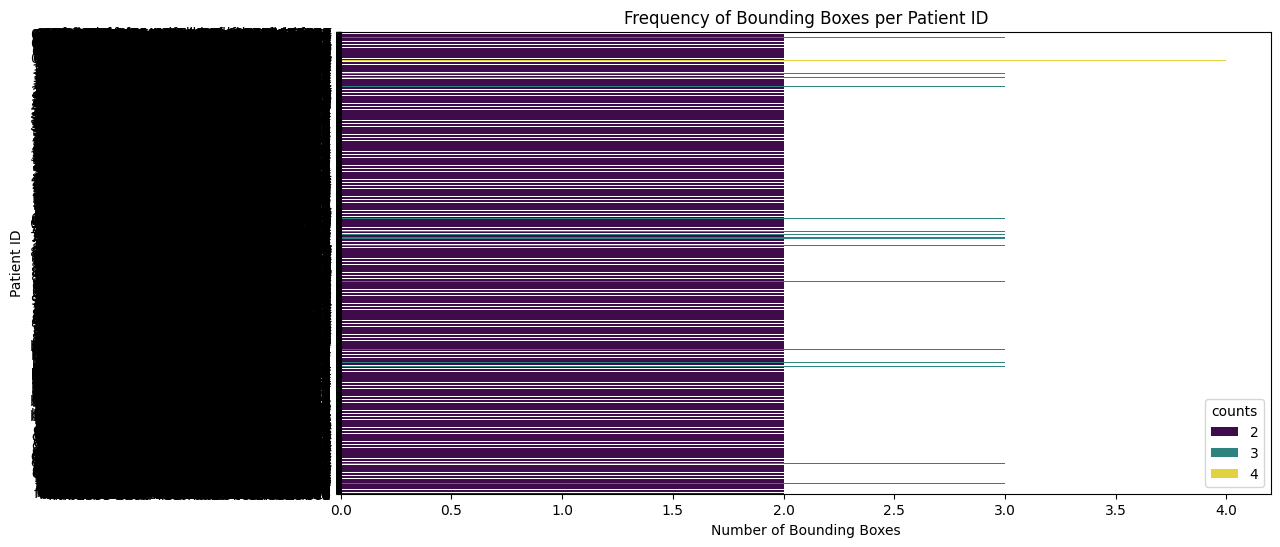

In [43]:
# Plot the most common bounding boxes
plt.figure(figsize=(12, 6))
sns.barplot(data=duplicate_bboxes, x='counts', y='patientId', hue='counts', palette='viridis')
plt.title("Frequency of Bounding Boxes per Patient ID")
plt.xlabel("Number of Bounding Boxes")
plt.ylabel("Patient ID")
plt.show()

In [44]:
# Group by patientId, Target, and class to count the number of bounding boxes
bbox_count = merged_df.groupby(['patientId', 'Target', 'class'])['patientId'].count()
bbox_df = pd.DataFrame(data={'Bounding Boxes': bbox_count.values}, index=bbox_count.index).reset_index()

# Group by number of bounding boxes, Target, and class to count occurrences
occurrences = bbox_df.groupby(['Bounding Boxes', 'Target', 'class']).count()
occurrences_df = pd.DataFrame(data=occurrences.values, index=occurrences.index).reset_index()

# Rename columns for clarity
occurrences_df.columns = ['Bounding Boxes', 'Target', 'Class', '#']


In [45]:
# Display the table
display(occurrences_df)

Bounding Boxes  Target                         Class      #
0               1       0  No Lung Opacity / Not Normal  11821
1               1       0                        Normal   8851
2               1       1                  Lung Opacity   2614
3               4       1                  Lung Opacity   3266
4               9       1                  Lung Opacity    119
5              16       1                  Lung Opacity     13

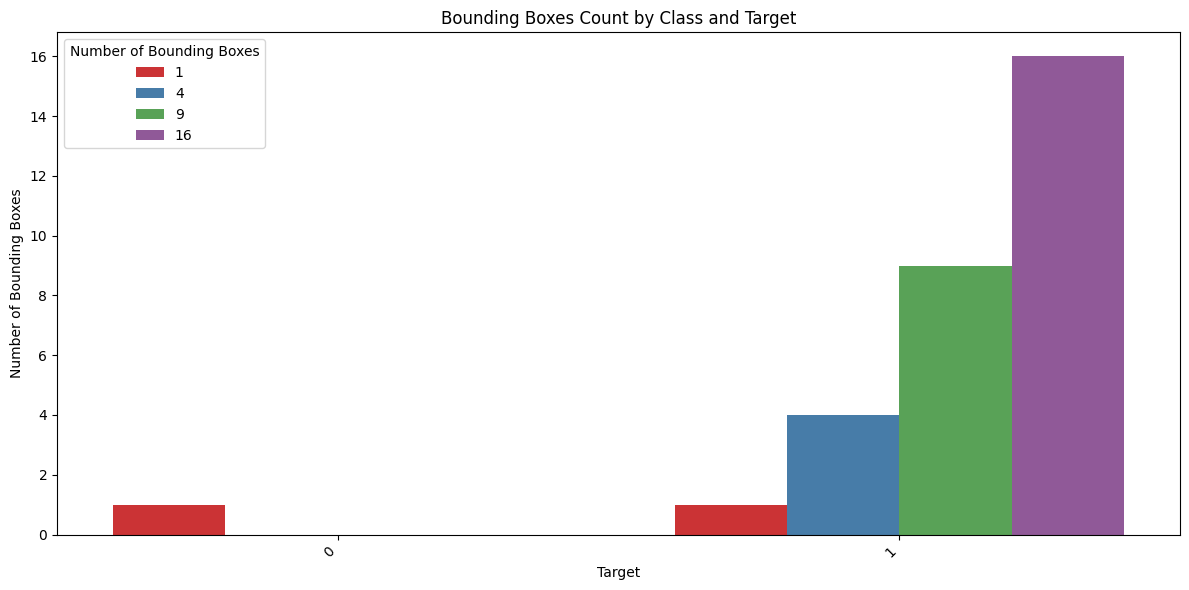

In [46]:
# Plot the number of bounding boxes per class and target
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(ax=ax, x='Target', y='Bounding Boxes', hue='Bounding Boxes', data=occurrences_df, palette='Set1')
plt.title("Bounding Boxes Count by Class and Target")
plt.xlabel('Target')
plt.ylabel('Number of Bounding Boxes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Number of Bounding Boxes')
plt.tight_layout()
plt.show()

In [47]:
# Display summary statistics
print(occurrences_df.groupby(['Bounding Boxes', 'Target', 'Class']).sum())


                                                        #
Bounding Boxes Target Class                              
1              0      No Lung Opacity / Not Normal  11821
                      Normal                         8851
               1      Lung Opacity                   2614
4              1      Lung Opacity                   3266
9              1      Lung Opacity                    119
16             1      Lung Opacity                     13


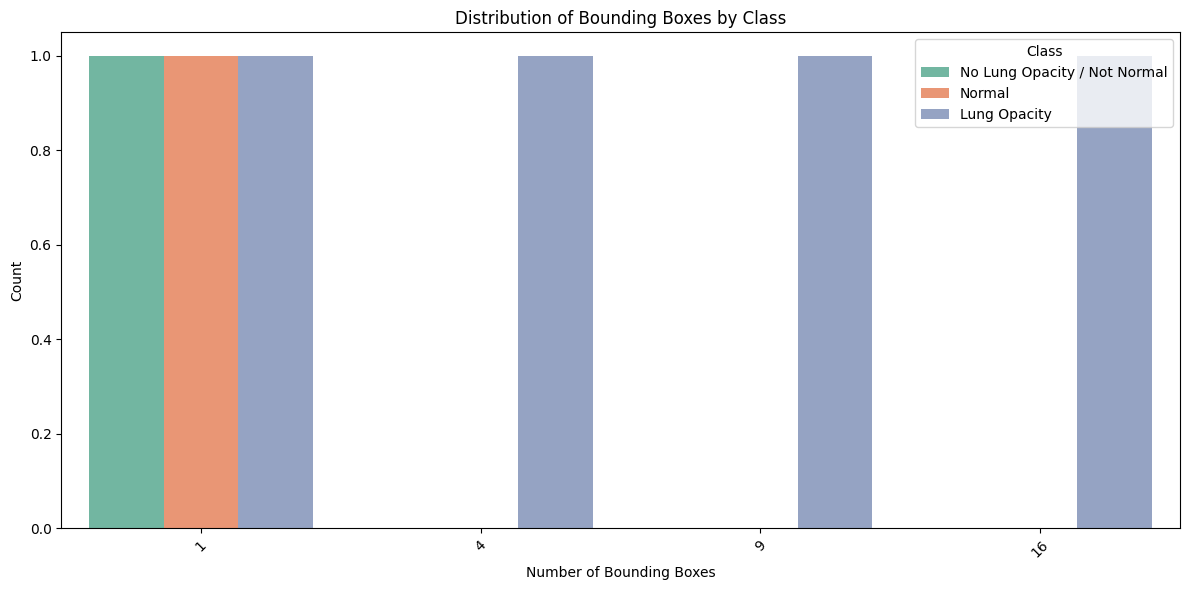

In [48]:
# Plot distribution of bounding boxes for each class
plt.figure(figsize=(12, 6))
sns.countplot(data=occurrences_df, x='Bounding Boxes', hue='Class', palette='Set2')
plt.title('Distribution of Bounding Boxes by Class')
plt.xlabel('Number of Bounding Boxes')
plt.ylabel('Count')
plt.legend(title='Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


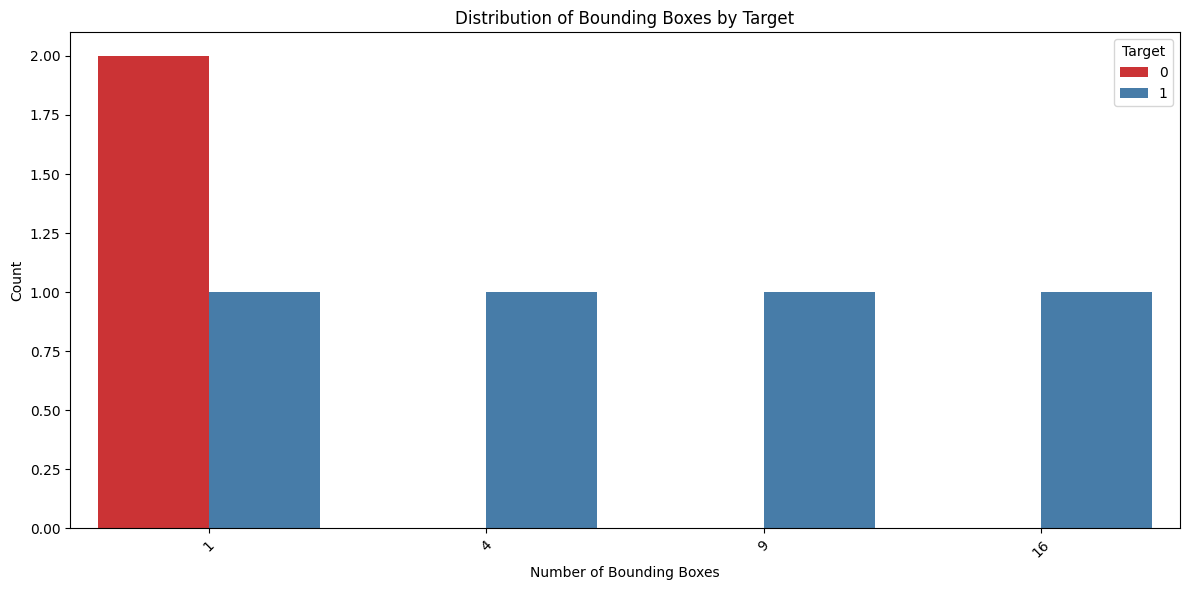

In [49]:
# Plot distribution of bounding boxes for each target
plt.figure(figsize=(12, 6))
sns.countplot(data=occurrences_df, x='Bounding Boxes', hue='Target', palette='Set1')
plt.title('Distribution of Bounding Boxes by Target')
plt.xlabel('Number of Bounding Boxes')
plt.ylabel('Count')
plt.legend(title='Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
# Check for duplicate bounding boxes in the merged dataset
duplicate_bboxes = merged_df[merged_df.duplicated(['patientId', 'x', 'y', 'width', 'height'], keep=False)]
print(f"Number of duplicate bounding boxes: {len(duplicate_bboxes)}")

Number of duplicate bounding boxes: 14343


In [51]:
# Display the first few rows of duplicate bounding boxes for inspection
print(duplicate_bboxes.head())

                               patientId      x      y  width  height  Target  \
4   00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   
5   00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1   
6   00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1   
7   00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1   
10  00704310-78a8-4b38-8475-49f4573b2dbb  323.0  577.0  160.0   104.0       1   

           class  
4   Lung Opacity  
5   Lung Opacity  
6   Lung Opacity  
7   Lung Opacity  
10  Lung Opacity  


In [52]:
# Drop bounding box related columns to check for duplicates in the rest of the data
non_bbox_duplicates = merged_df.drop(columns=['x', 'y', 'width', 'height']).duplicated().sum()
print(f"Number of non-bounding box duplicates: {non_bbox_duplicates}")

Number of non-bounding box duplicates: 10945


In [53]:
# Aggregate bounding boxes per patient
aggregated_data = merged_df.groupby('patientId').agg({
    'x': list,
    'y': list,
    'width': list,
    'height': list,
    'Target': 'first',  # Assuming Target is consistent for the patient
    'class': 'first'     # Assuming class is consistent
}).reset_index()

In [54]:
print(aggregated_data.head())

                              patientId                             x  \
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6                         [nan]   
1  000924cf-0f8d-42bd-9158-1af53881a557                         [nan]   
2  000db696-cf54-4385-b10b-6b16fbb3f985  [316.0, 316.0, 660.0, 660.0]   
3  000fe35a-2649-43d4-b027-e67796d412e0    [570.0, 570.0, 83.0, 83.0]   
4  001031d9-f904-4a23-b3e5-2c088acd19c6    [66.0, 66.0, 552.0, 552.0]   

                              y                         width  \
0                         [nan]                         [nan]   
1                         [nan]                         [nan]   
2  [318.0, 318.0, 375.0, 375.0]  [170.0, 170.0, 146.0, 146.0]   
3  [282.0, 282.0, 227.0, 227.0]  [269.0, 269.0, 296.0, 296.0]   
4  [160.0, 160.0, 164.0, 164.0]  [373.0, 373.0, 376.0, 376.0]   

                         height  Target                         class  
0                         [nan]       0  No Lung Opacity / Not Normal  
1                         

In [55]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26684 entries, 0 to 26683
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  26684 non-null  object
 1   x          26684 non-null  object
 2   y          26684 non-null  object
 3   width      26684 non-null  object
 4   height     26684 non-null  object
 5   Target     26684 non-null  int64 
 6   class      26684 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.4+ MB


In [56]:
print(f"Number of files in aggregated_data: {len(aggregated_data)}")

Number of files in aggregated_data: 26684


In [57]:
# Correct path to the directory containing DICOM files
train_image_dir = '/content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images'

In [58]:
# Extract patient IDs from image files
train_image_files = {os.path.splitext(f)[0] for f in os.listdir(train_image_dir) if f.endswith('.dcm')}

In [59]:
# Get list of patient IDs from aggregated data
patient_ids = set(aggregated_data['patientId'])

In [60]:
# Check if all patient IDs have corresponding images in the train and test directories
missing_train_images = patient_ids - train_image_files

In [61]:
# Print detailed debug information
print(f"Total patient IDs in aggregated data: {len(patient_ids)}")
print(f"Total train DICOM files found: {len(train_image_files)}")

Total patient IDs in aggregated data: 26684
Total train DICOM files found: 26684


In [62]:
if not missing_train_images:
    print("All train images are accounted for.")
else:
    print(f"Missing train images for patient IDs: {missing_train_images}")


All train images are accounted for.


In [63]:
# 2. Data Summary
print("\nTrain DICOM Info Summary:")
print(train_dicom_info.describe(include='all'))
print("\nTest DICOM Info Summary:")
print(test_dicom_info.describe(include='all'))



Train DICOM Info Summary:
                                                file_path  \
count                                               26684   
unique                                              26684   
top     /content/path/to/extracted/train_images/stage_...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                  patient_id    width   height modality  \
count                                  26684  26684.0  26684.0    26684   
unique                                 26684      NaN      NaN        1   
top     b848084

In [64]:
# Check for missing values in DICOM info
print("\nMissing values in train DICOM info:")
print(train_dicom_info.isnull().sum())
print("\nMissing values in test DICOM info:")
print(test_dicom_info.isnull().sum())



Missing values in train DICOM info:
file_path             0
patient_id            0
width                 0
height                0
modality              0
pixel_spacing         0
bits_stored           0
image_position    26684
dtype: int64

Missing values in test DICOM info:
file_path            0
patient_id           0
width                0
height               0
modality             0
pixel_spacing        0
bits_stored          0
image_position    3000
dtype: int64


In [65]:
# Merge class info with DICOM data
dicom_class_info = pd.merge(train_dicom_info, aggregated_data, left_on='patient_id', right_on='patientId', how='left')
print(dicom_class_info.head())

                                           file_path  \
0  /content/path/to/extracted/train_images/stage_...   
1  /content/path/to/extracted/train_images/stage_...   
2  /content/path/to/extracted/train_images/stage_...   
3  /content/path/to/extracted/train_images/stage_...   
4  /content/path/to/extracted/train_images/stage_...   

                             patient_id  width_x  height_x modality  \
0  b848084c-ca9f-48b7-865b-3a1761fd9775     1024      1024       CR   
1  e93cb113-b755-4672-8294-7d5edeec2199     1024      1024       CR   
2  ef4c62dd-8abe-4c3b-b604-307a2f55f821     1024      1024       CR   
3  9e908660-687d-4c75-9b1a-d18400f52ea2     1024      1024       CR   
4  eca49e7a-b4a4-4d67-aa47-cd980cd5a521     1024      1024       CR   

                                pixel_spacing  bits_stored image_position  \
0                              [0.171, 0.171]            8           None   
1                              [0.171, 0.171]            8           None   
2  [0

**Observations:**

**No Lung Opacity (Target = 0):** All displayed entries have no annotated bounding boxes (NaN values) and are labeled as either "Normal" or "No Lung Opacity / Not Normal."

**Consistent DICOM Info:** All images are 1024x1024 pixels, with modality "CR" and valid pixel spacing values.

**Action Points:** The dataset is correctly merged for further analysis or model training. Need to  address class imbalance and visualizing data for better insights.

In [66]:
# Define a function to visualize sample images from the merged DataFrame
def visualize_sample_images(dicom_class_df, num_samples=5):
    sample_df = dicom_class_df.sample(n=num_samples)
    image_tuples = []
    for _, row in sample_df.iterrows():
        image_file = row['file_path']
        image_array = load_dicom_image(image_file)[1]  # Only need the array
        image_tuples.append((image_file, image_array))
    display_images(image_tuples, title="Sample Images")


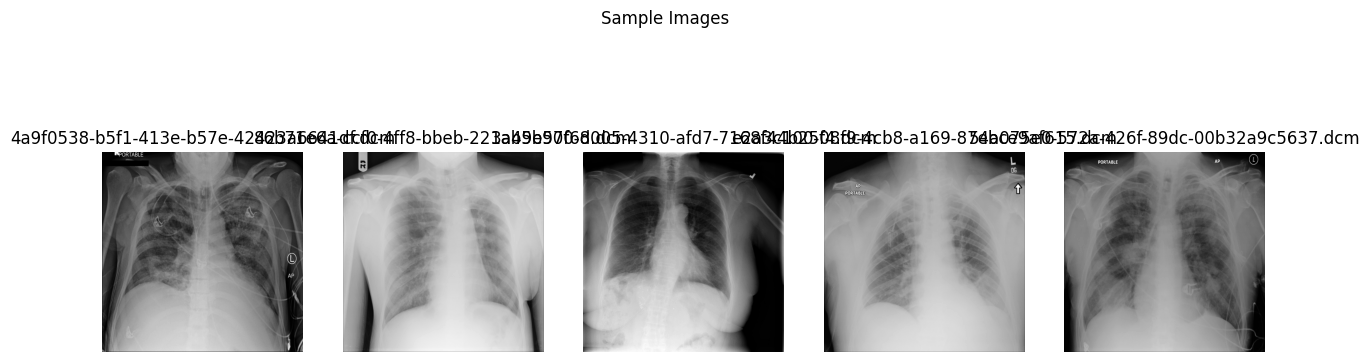

In [67]:
# Visualize sample images
visualize_sample_images(dicom_class_info)

In [68]:
# Add flags for missing values in the 'image_position' column
dicom_class_info['image_position_missing'] = dicom_class_info['image_position'].isnull().astype(int)


In [69]:
# Check if the entire list in 'x' is NaN or contains NaN values Similarly for 'y', 'width_y', and 'height_y'
dicom_class_info['x_missing'] = dicom_class_info['x'].apply(lambda x: 1 if pd.isna(x).all() or any(pd.isna(val) for val in x) else 0)
dicom_class_info['y_missing'] = dicom_class_info['y'].apply(lambda y: 1 if pd.isna(y).all() or any(pd.isna(val) for val in y) else 0)
dicom_class_info['width_y_missing'] = dicom_class_info['width_y'].apply(lambda w: 1 if pd.isna(w).all() or any(pd.isna(val) for val in w) else 0)
dicom_class_info['height_y_missing'] = dicom_class_info['height_y'].apply(lambda h: 1 if pd.isna(h).all() or any(pd.isna(val) for val in h) else 0)

In [70]:
'''# Add flags for missing values in the bounding box information
dicom_class_info['x_missing'] = dicom_class_info['x'].isnull().astype(int)
dicom_class_info['y_missing'] = dicom_class_info['y'].isnull().astype(int)
dicom_class_info['width_y_missing'] = dicom_class_info['width_y'].isnull().astype(int)
dicom_class_info['height_y_missing'] = dicom_class_info['height_y'].isnull().astype(int)'''

"# Add flags for missing values in the bounding box information\ndicom_class_info['x_missing'] = dicom_class_info['x'].isnull().astype(int)\ndicom_class_info['y_missing'] = dicom_class_info['y'].isnull().astype(int)\ndicom_class_info['width_y_missing'] = dicom_class_info['width_y'].isnull().astype(int)\ndicom_class_info['height_y_missing'] = dicom_class_info['height_y'].isnull().astype(int)"

In [71]:
# Display the updated DataFrame to verify flags
print(dicom_class_info.head())

                                           file_path  \
0  /content/path/to/extracted/train_images/stage_...   
1  /content/path/to/extracted/train_images/stage_...   
2  /content/path/to/extracted/train_images/stage_...   
3  /content/path/to/extracted/train_images/stage_...   
4  /content/path/to/extracted/train_images/stage_...   

                             patient_id  width_x  height_x modality  \
0  b848084c-ca9f-48b7-865b-3a1761fd9775     1024      1024       CR   
1  e93cb113-b755-4672-8294-7d5edeec2199     1024      1024       CR   
2  ef4c62dd-8abe-4c3b-b604-307a2f55f821     1024      1024       CR   
3  9e908660-687d-4c75-9b1a-d18400f52ea2     1024      1024       CR   
4  eca49e7a-b4a4-4d67-aa47-cd980cd5a521     1024      1024       CR   

                                pixel_spacing  bits_stored image_position  \
0                              [0.171, 0.171]            8           None   
1                              [0.171, 0.171]            8           None   
2  [0

Rows with 1s indicate missing values in the corresponding fields (image_position, x, y, width_y, height_y)

In [72]:
# Optional: Save the updated DataFrame with flags
#train_data.to_csv('/content/drive/MyDrive/Capstone Project/train_data_with_flags.csv', index=False)

In [73]:
# Initialize the dictionary to store annotations
annotations = {}

In [74]:
# Iterate over each row in train_data
for index, row in dicom_class_info.iterrows():
    image_path = row['file_path']

    # Check if the annotations should be included based on the flags
    if row['Target'] == 1:
        # Extract bounding box details if the target is 1
        annotation = {
            'x': row['x'] if row['x_missing'] == 0 else None,
            'y': row['y'] if row['y_missing'] == 0 else None,
            'width': row['width_y'] if row['width_y_missing'] == 0 else None,
            'height': row['height_y'] if row['height_y_missing'] == 0 else None,
            'target': row['Target']
        }
    else:
        # For Target == 0 or 'Not Normal No Lung Opacity', set annotations to None if missing
        annotation = {
            'x': None,
            'y': None,
            'width': None,
            'height': None,
            'target': row['Target']
        }

    # Add the annotation to the dictionary
    annotations[image_path] = annotation


In [75]:
# Print some sample annotations
for i, (image_path, annotation) in enumerate(list(annotations.items())[:5]):
    print(f"Image Path: {image_path}")
    print(f"Annotations: {annotation}")
    print()

Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/b848084c-ca9f-48b7-865b-3a1761fd9775.dcm
Annotations: {'x': None, 'y': None, 'width': None, 'height': None, 'target': 0}

Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/e93cb113-b755-4672-8294-7d5edeec2199.dcm
Annotations: {'x': None, 'y': None, 'width': None, 'height': None, 'target': 0}

Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/ef4c62dd-8abe-4c3b-b604-307a2f55f821.dcm
Annotations: {'x': None, 'y': None, 'width': None, 'height': None, 'target': 0}

Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/9e908660-687d-4c75-9b1a-d18400f52ea2.dcm
Annotations: {'x': None, 'y': None, 'width': None, 'height': None, 'target': 0}

Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/eca49e7a-b4a4-4d67-aa47-cd980cd5a521.dcm
A

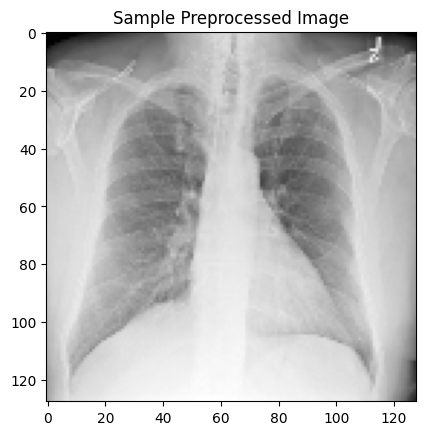

In [76]:
def preprocess_image(image_path, target_size=(128, 128)):
    """
    Preprocess the DICOM image by loading, normalizing, and resizing it.

    Parameters:
    - image_path: Path to the DICOM file.
    - target_size: Desired size of the output image (default: 128x128).

    Returns:
    - The preprocessed image as a NumPy array, or None if an error occurs.
    """
    try:
        # Load the DICOM file
        dicom = pydicom.dcmread(image_path)

        # Convert to NumPy array and normalize to 0-1
        image = dicom.pixel_array
        image_normalized = image / np.max(image)

        # Resize the image
        image_resized = cv2.resize(image_normalized, target_size)

        return image_resized
    except Exception as e:
        print(f"Warning: Failed to process image at path: {image_path}. Error: {str(e)}")
        return None

# Sample usage
preprocessed_images = [preprocess_image(path) for path in train_dicom_files[:5]]

# Visualizing a sample preprocessed image
plt.imshow(preprocessed_images[0], cmap='gray')
plt.title('Sample Preprocessed Image')
plt.show()


In [77]:
# Display a few images with bounding boxes
def plot_sample_images_with_bboxes(dicom_class_info, num_samples=5):
    plt.figure(figsize=(15, 10))

    for i in range(num_samples):
        img_info = dicom_class_info.iloc[i]
        image_path = img_info['image_path']  # Assuming the column name is 'image_path'
        image = preprocess_image(image_path)

        # Plot image
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(image, cmap='gray')

        # Draw bounding box if available
        if img_info['Target'] == 1:
            x, y, width, height = img_info['x'], img_info['y'], img_info['width_y'], img_info['height_y']
            plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none'))

        plt.title(f"Target: {img_info['Target']}")
        plt.axis('off')

    plt.show()

In [78]:
# Visualize Class Distribution
def plot_class_distribution(dicom_class_info):
    sns.countplot(x='Target', data=dicom_class_info)
    plt.title("Class Distribution")
    plt.xlabel("Target")
    plt.ylabel("Count")
    plt.show()

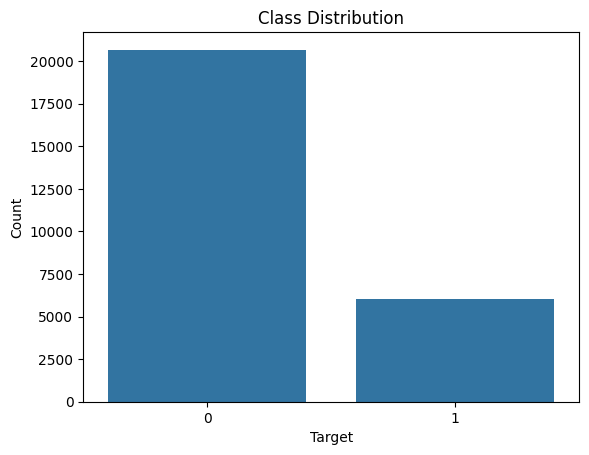

In [79]:
plot_class_distribution(dicom_class_info)

In [80]:
image_path = dicom_class_info['file_path'].iloc[0]
processed_image = preprocess_image(image_path)
if processed_image is not None:
    print("Image processed successfully")
else:
    print("Failed to process image")


Image processed successfully


In [81]:
# Preprocess Images
dicom_class_info['preprocessed_image'] = dicom_class_info['file_path'].apply(preprocess_image)

In [82]:
# Count the number of problematic paths where the function returned None
problematic_paths_count = dicom_class_info['preprocessed_image'].isnull().sum()

print(f"Number of problematic paths: {problematic_paths_count}")

Number of problematic paths: 0


In [83]:
# Check a few entries to confirm that the images were processed successfully
print(dicom_class_info[['file_path', 'preprocessed_image']].head())

                                           file_path  \
0  /content/path/to/extracted/train_images/stage_...   
1  /content/path/to/extracted/train_images/stage_...   
2  /content/path/to/extracted/train_images/stage_...   
3  /content/path/to/extracted/train_images/stage_...   
4  /content/path/to/extracted/train_images/stage_...   

                                  preprocessed_image  
0  [[0.06623931623931624, 0.06623931623931624, 0....  
1  [[0.26276595744680853, 0.2723404255319149, 0.2...  
2  [[0.8068627450980392, 0.49215686274509807, 0.1...  
3  [[0.036274509803921565, 0.055882352941176466, ...  
4  [[0.08529411764705883, 0.07450980392156863, 0....  


In [84]:
def visualize_preprocessed_image(image_array):
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')
    plt.show()



Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/b848084c-ca9f-48b7-865b-3a1761fd9775.dcm


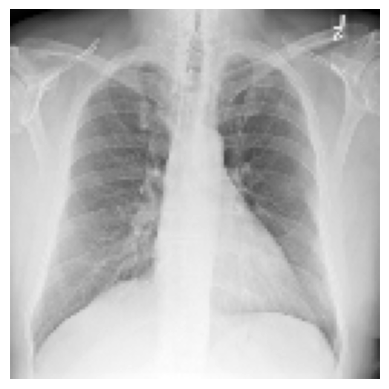

Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/e93cb113-b755-4672-8294-7d5edeec2199.dcm


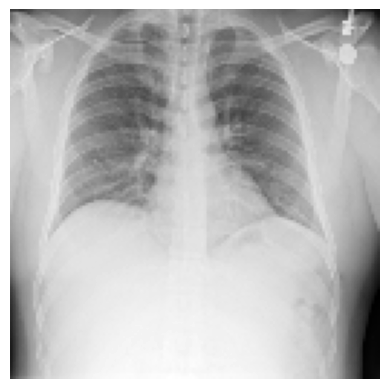

Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/ef4c62dd-8abe-4c3b-b604-307a2f55f821.dcm


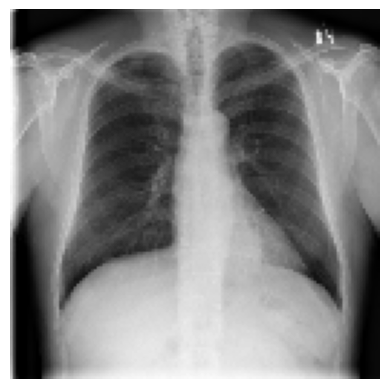

Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/9e908660-687d-4c75-9b1a-d18400f52ea2.dcm


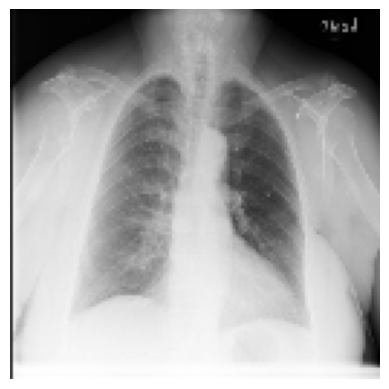

Image Path: /content/path/to/extracted/train_images/stage_2_train_images/stage_2_train_images/eca49e7a-b4a4-4d67-aa47-cd980cd5a521.dcm


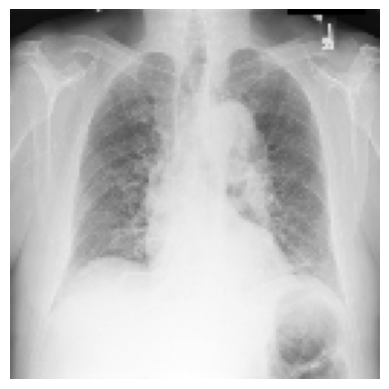

In [85]:
# Visualize a few preprocessed images
for i in range(5):
    print(f"Image Path: {dicom_class_info['file_path'].iloc[i]}")
    visualize_preprocessed_image(dicom_class_info['preprocessed_image'].iloc[i])

In [86]:
def resize_image(image, max_size=512):
    """Resize image to fit within max_size while maintaining aspect ratio."""
    height, width = image.shape[:2]
    if height > width:
        new_height = max_size
        new_width = int((new_height / height) * width)
    else:
        new_width = max_size
        new_height = int((new_width / width) * height)

    resized_image = cv2.resize(image, (new_width, new_height))
    return resized_image

In [87]:
def draw_bounding_box(image, x, y, width, height):
    """Draw bounding box on image."""
    # Check if values are arrays and convert to scalars if necessary
    if isinstance(x, list) and len(x) > 0:
        x = x[0]
    if isinstance(y, list) and len(y) > 0:
        y = y[0]
    if isinstance(width, list) and len(width) > 0:
        width = width[0]
    if isinstance(height, list) and len(height) > 0:
        height = height[0]

    # Convert to int for OpenCV
    try:
        x, y, width, height = int(x), int(y), int(width), int(height)
    except (ValueError, TypeError):
        return image  # Return the image as is if conversion fails

    # Draw rectangle around the bounding box
    image_with_bbox = cv2.rectangle(image.copy(), (x, y), (x + width, y + height), (255, 0, 0), 2)

    return image_with_bbox

In [88]:
def display_images_with_bboxes(dicom_class_info):
    """Display images with bounding boxes."""
    # Ensure columns are properly named and exist
    required_columns = ['file_path', 'x', 'y', 'width_y', 'height_y']
    for column in required_columns:
        if column not in dicom_class_info.columns:
            raise KeyError(f"Column '{column}' is missing from the DataFrame.")

    for index, row in dicom_class_info.iterrows():
        image_path = row['file_path']
        x = row['x']
        y = row['y']
        width = row['width_y']
        height = row['height_y']

        # Load and preprocess the image
        image = preprocess_image(image_path)
        if image is None:
            continue

        # Resize the image for better visibility
        image = resize_image(image)

        # Draw bounding box
        image_with_bbox = draw_bounding_box(image, x, y, width, height)

        # Display image
        plt.figure(figsize=(8, 8))
        plt.imshow(image_with_bbox, cmap='gray')
        plt.title(f"Image: {image_path}")
        plt.axis('off')
        plt.show()

        # Optionally, display only a subset of images
        if index >= 10:  # Display first 10 images
            break

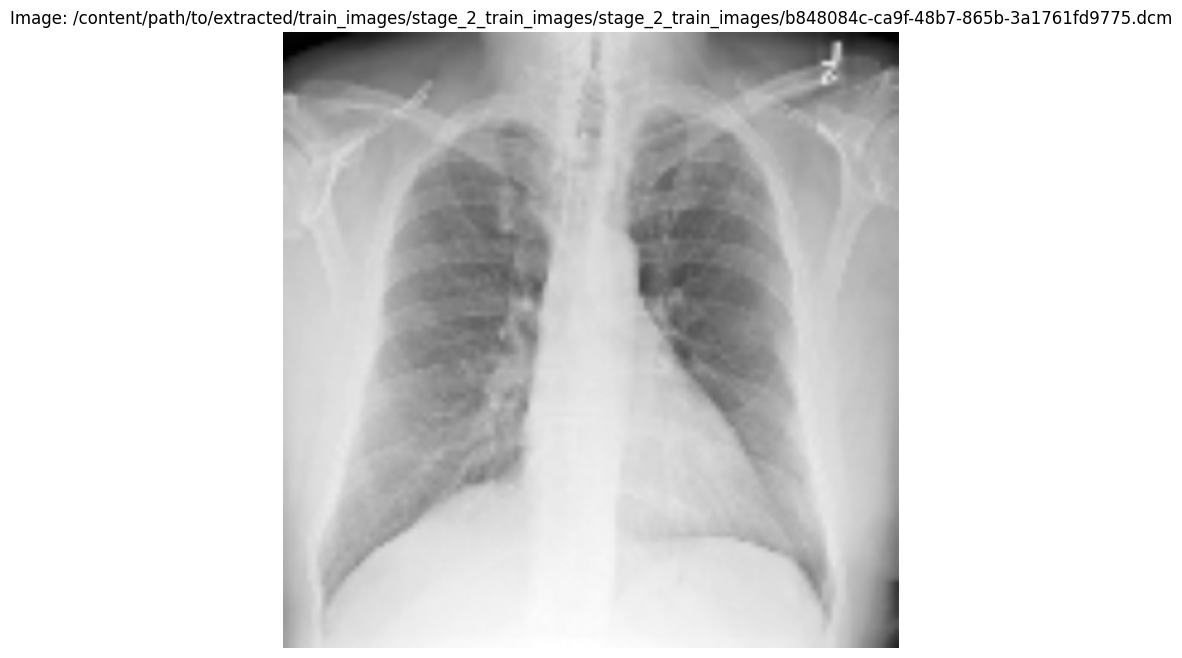

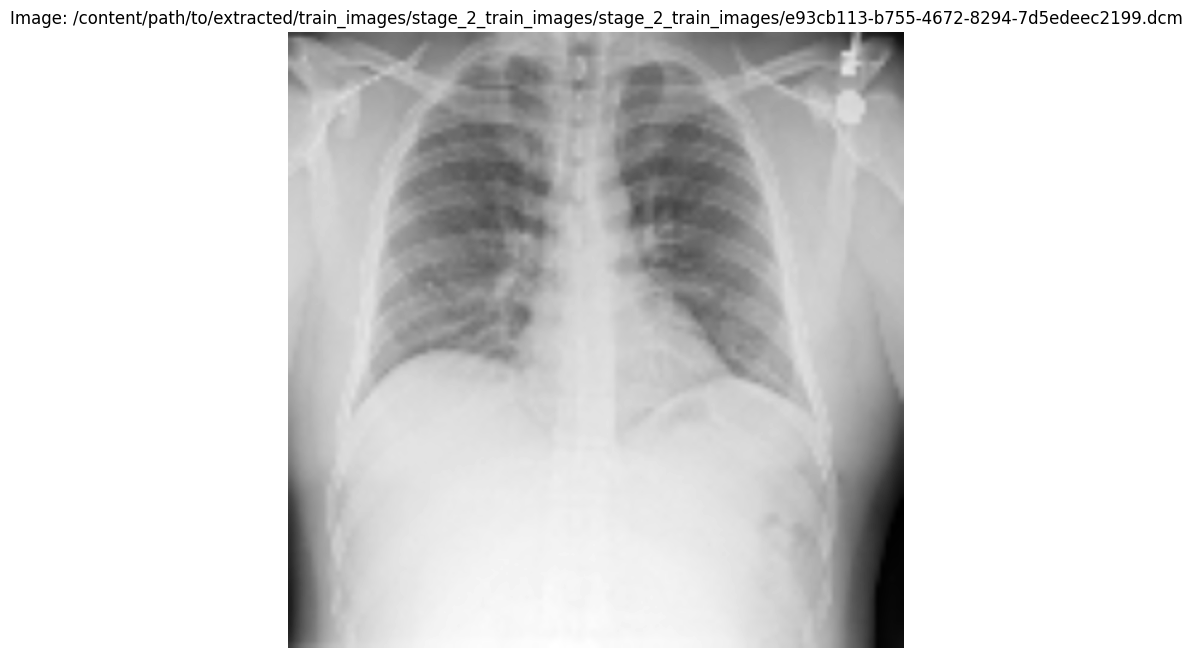

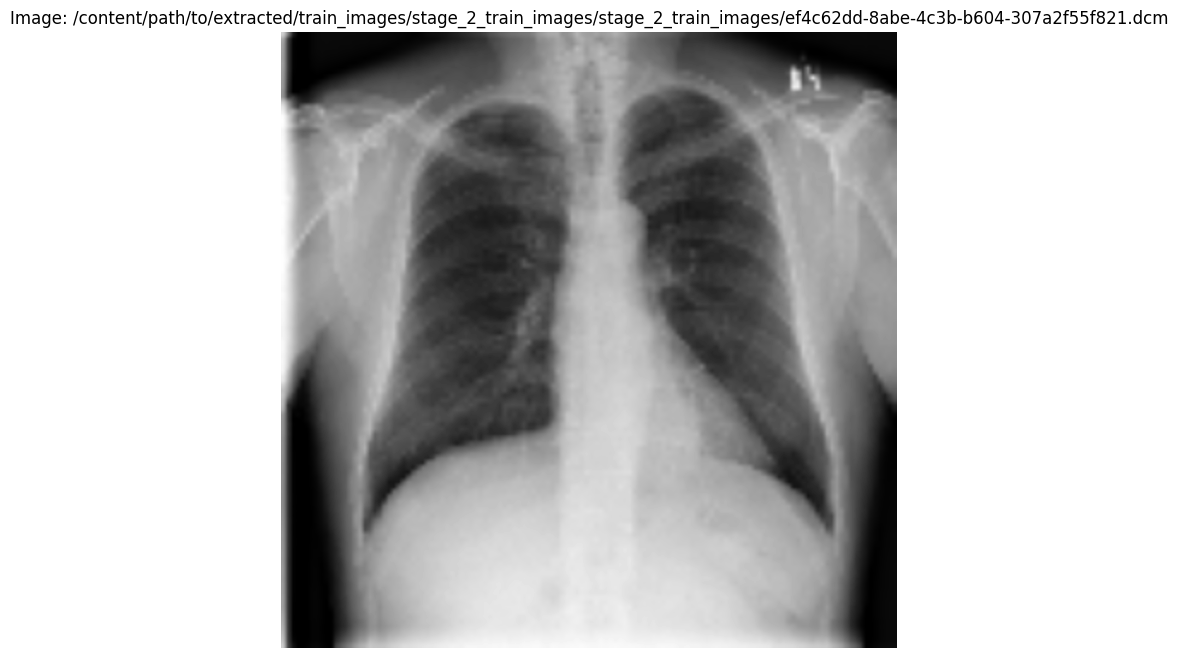

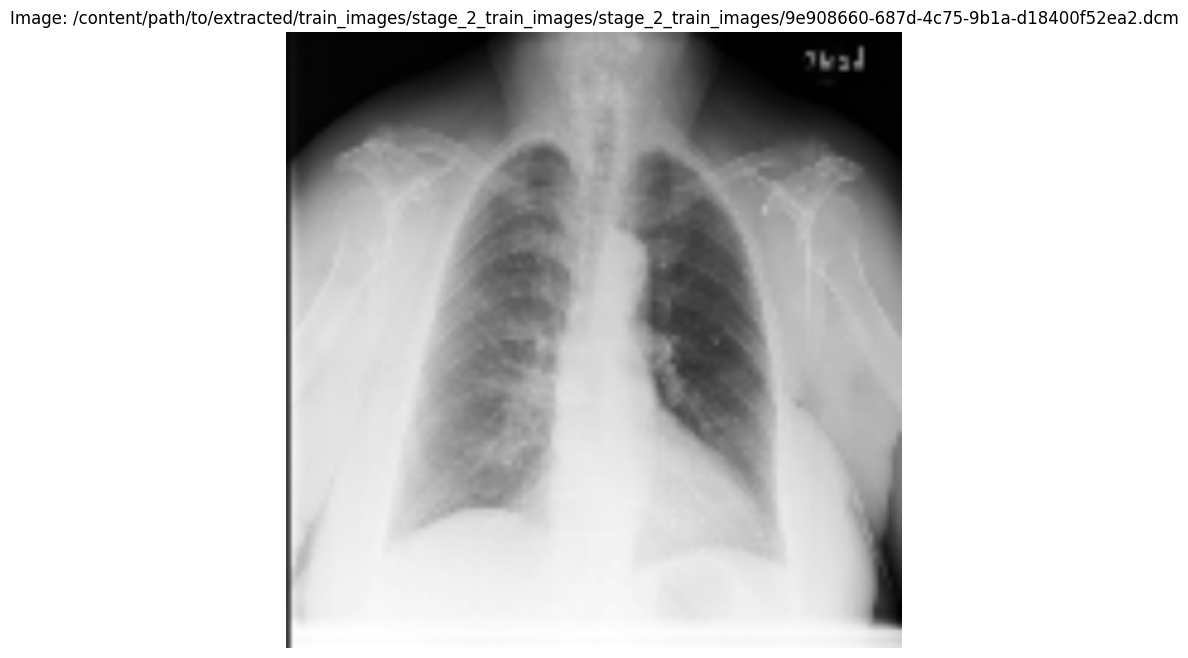

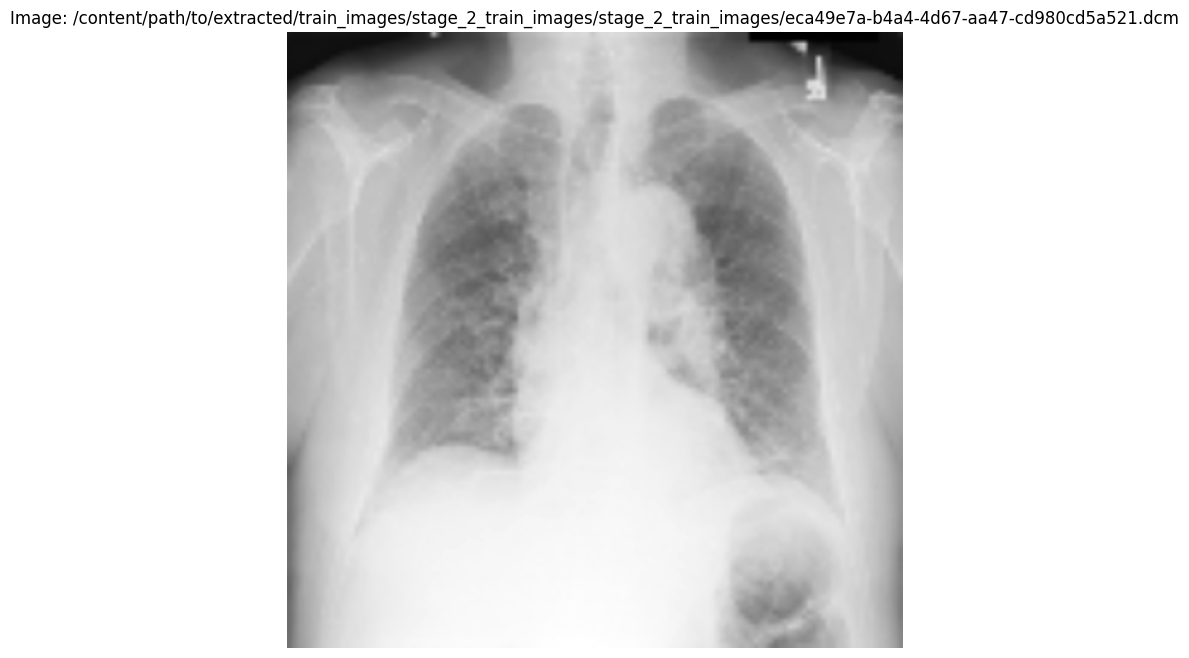

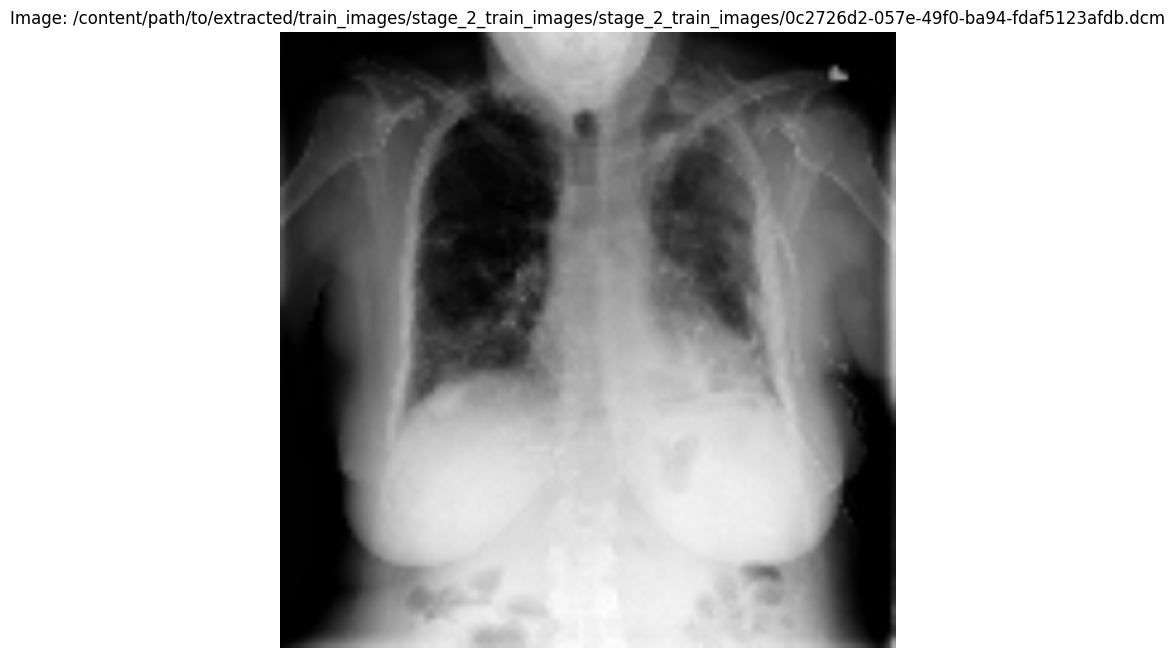

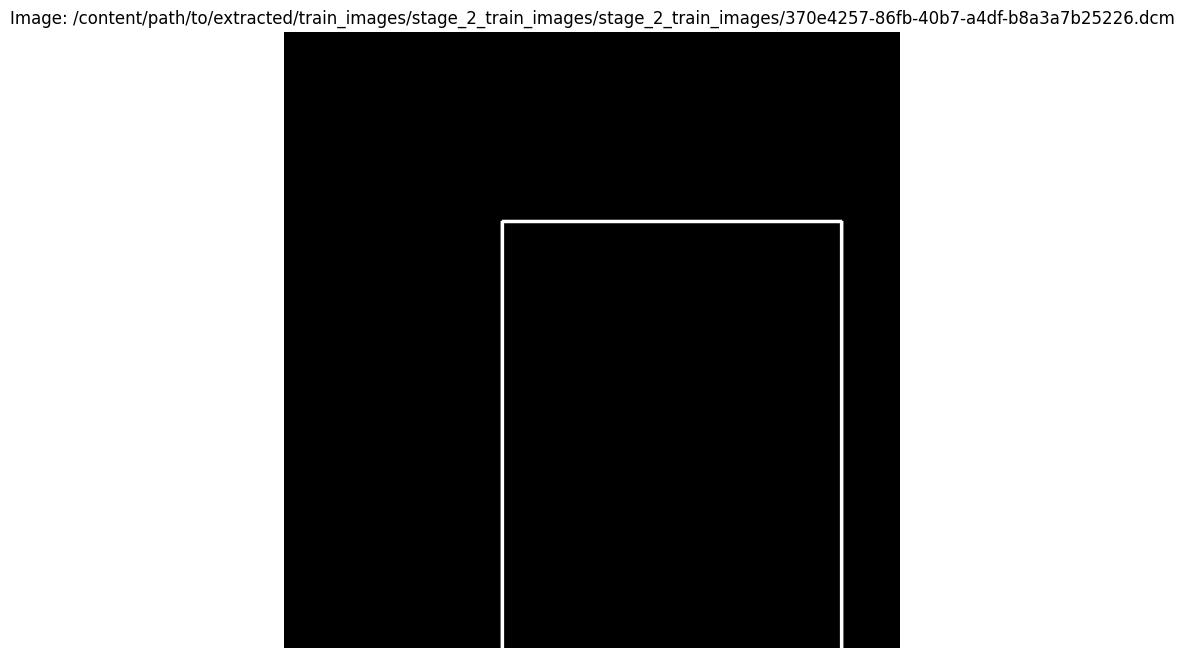

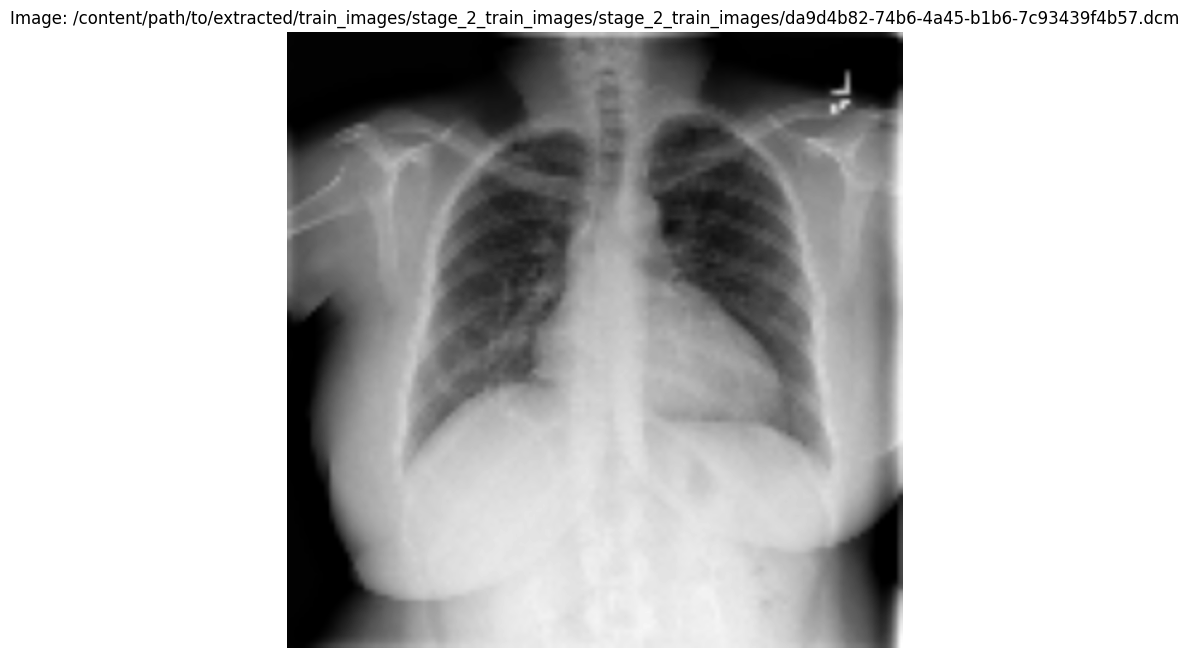

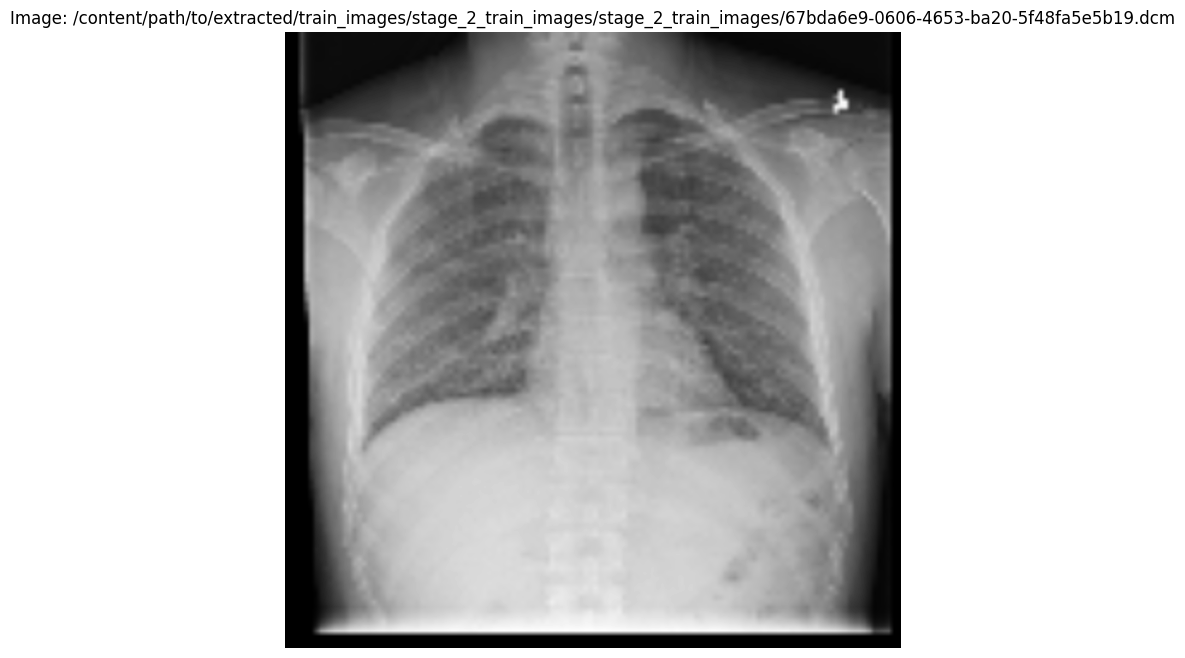

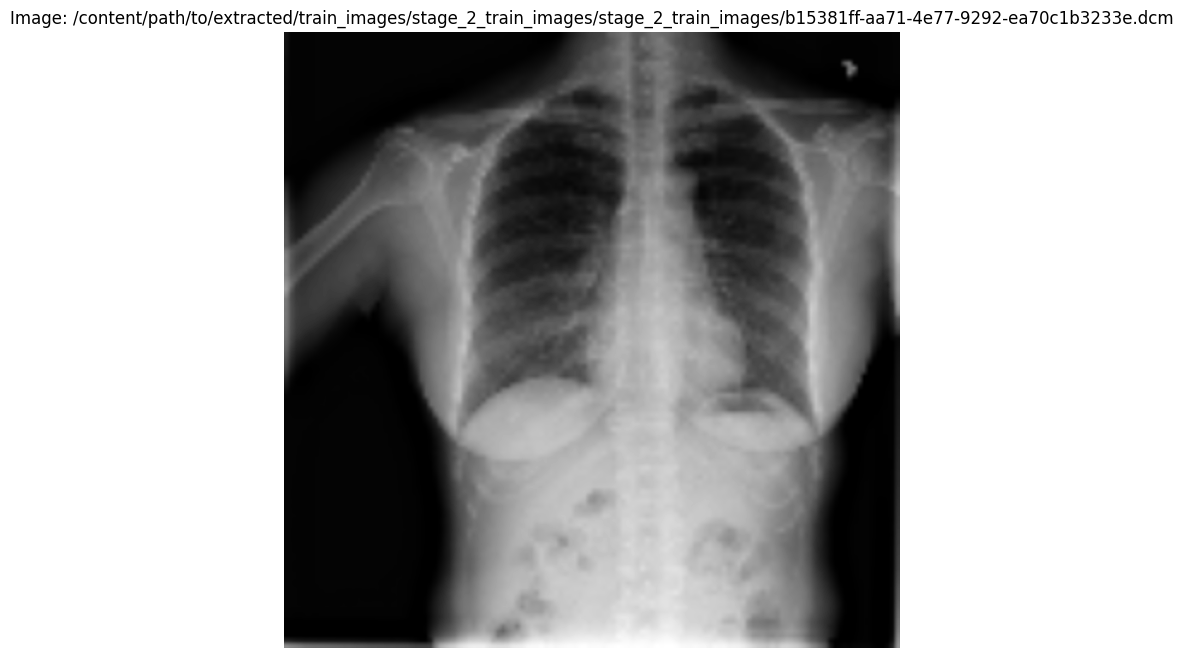

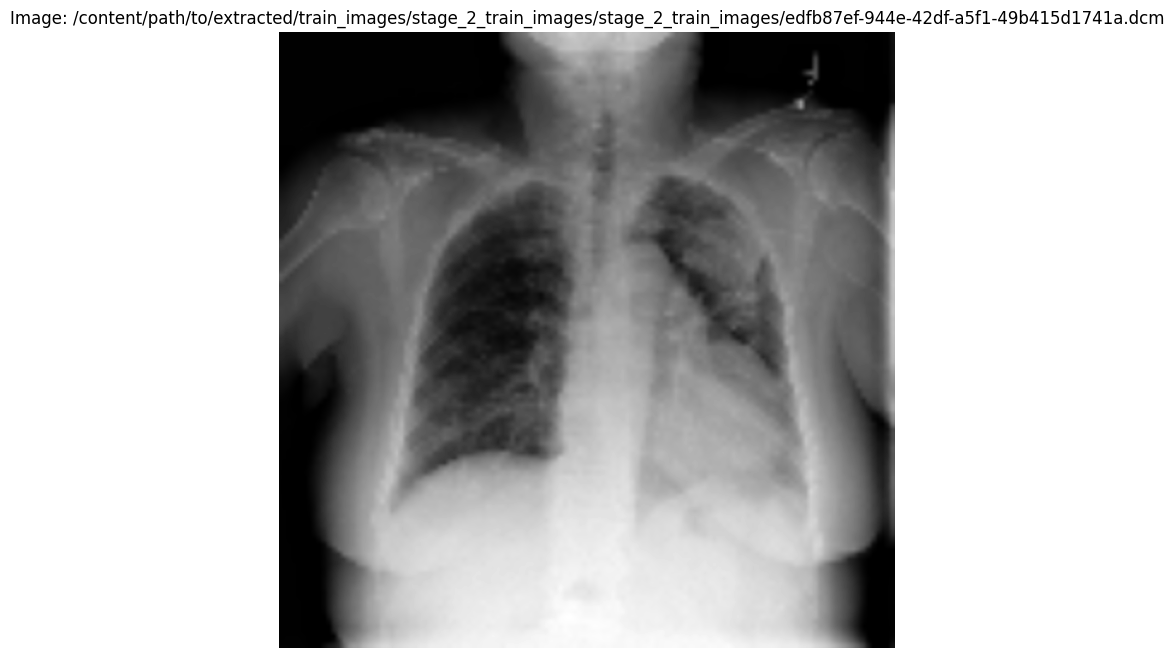

In [89]:
# Assuming train_data is the DataFrame containing the paths and annotations
display_images_with_bboxes(dicom_class_info)

In [90]:
# Print column names to verify
print(dicom_class_info.columns)

Index(['file_path', 'patient_id', 'width_x', 'height_x', 'modality',
       'pixel_spacing', 'bits_stored', 'image_position', 'patientId', 'x', 'y',
       'width_y', 'height_y', 'Target', 'class', 'image_position_missing',
       'x_missing', 'y_missing', 'width_y_missing', 'height_y_missing',
       'preprocessed_image'],
      dtype='object')


In [91]:
dicom_class_info.head()

file_path  \
0  /content/path/to/extracted/train_images/stage_...   
1  /content/path/to/extracted/train_images/stage_...   
2  /content/path/to/extracted/train_images/stage_...   
3  /content/path/to/extracted/train_images/stage_...   
4  /content/path/to/extracted/train_images/stage_...   

                             patient_id  width_x  height_x modality  \
0  b848084c-ca9f-48b7-865b-3a1761fd9775     1024      1024       CR   
1  e93cb113-b755-4672-8294-7d5edeec2199     1024      1024       CR   
2  ef4c62dd-8abe-4c3b-b604-307a2f55f821     1024      1024       CR   
3  9e908660-687d-4c75-9b1a-d18400f52ea2     1024      1024       CR   
4  eca49e7a-b4a4-4d67-aa47-cd980cd5a521     1024      1024       CR   

                                pixel_spacing  bits_stored image_position  \
0                              [0.171, 0.171]            8           None   
1                              [0.171, 0.171]            8           None   
2  [0.14300000000000002, 0.14300000000000002]            8           None   
3                              [0.168, 0.168]            8           None   
4                              [0.171, 0.171]            8           None   

                              patientId      x  ... width_y height_y Target  \
0  b848084c-ca9f-48b7-865b-3a1761fd9775  [nan]  ...   [nan]    [nan]      0   
1  e93cb113-b755-4672-8294-7d5edeec2199  [nan]  ...   [nan]    [nan]      0   
2  ef4c62dd-8abe-4c3b-b604-307a2f55f821  [nan]  ...   [nan]    [nan]      0   
3  9e908660-687d-4c75-9b1a-d18400f52ea2  [nan]  ...   [nan]    [nan]      0   
4  eca49e7a-b4a4-4d67-aa47-cd980cd5a521  [nan]  ...   [nan]    [nan]      0   

                          class image_position_missing  x_missing  y_missing  \
0  No Lung Opacity / Not Normal                      1          1          1   
1                        Normal                      1          1          1   
2                        Normal                      1          1          1   
3  No Lung Opacity / Not Normal                      1          1          1   
4  No Lung Opacity / Not Normal                      1          1          1   

   width_y_missing  height_y_missing  \
0                1                 1   
1                1                 1   
2                1                 1   
3                1                 1   
4                1                 1   

                                  preprocessed_image  
0  [[0.06623931623931624, 0.06623931623931624, 0....  
1  [[0.26276595744680853, 0.2723404255319149, 0.2...  
2  [[0.8068627450980392, 0.49215686274509807, 0.1...  
3  [[0.036274509803921565, 0.055882352941176466, ...  
4  [[0.08529411764705883, 0.07450980392156863, 0....  

[5 rows x 21 columns]

In [92]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from tensorflow.keras.utils import Sequence



In [93]:
# Separate majority and minority classes
train_data_majority = dicom_class_info[dicom_class_info.Target == 0]
train_data_minority = dicom_class_info[dicom_class_info.Target == 1]

In [94]:
# Upsample minority class
train_data_minority_upsampled = resample(train_data_minority,
                                         replace=True,     # Sample with replacement
                                         n_samples=len(train_data_majority), # Match the number of majority class
                                         random_state=42)  # Reproducible results

In [95]:
# Combine majority class with upsampled minority class
train_data_balanced = pd.concat([train_data_majority, train_data_minority_upsampled])

In [96]:
# Shuffle the combined dataset
train_data_balanced = train_data_balanced.sample(frac=1, random_state=42)

In [97]:
# Now your dataset is balanced
print(train_data_balanced['Target'].value_counts())

Target
0    20672
1    20672
Name: count, dtype: int64


In [98]:
# Function to load and preprocess DICOM images
def preprocess_image(file_path, target_size=(128, 128)):
    # Load the DICOM file
    dicom = pydicom.dcmread(file_path)
    # Extract the pixel array from the DICOM file
    image = dicom.pixel_array
    # Normalize the image to the range 0-255
    image = (image / np.max(image)) * 255.0
    # Resize the image
    resized_image = cv2.resize(image, target_size)
    # Convert to 8-bit unsigned integer
    resized_image = resized_image.astype(np.uint8)
    # Add a channel dimension for grayscale images
    resized_image = np.expand_dims(resized_image, axis=-1)
    return resized_image

In [99]:
# Split into training and validation sets
train_df, val_df = train_test_split(train_data_balanced, test_size=0.2, random_state=42, stratify=train_data_balanced['Target'])

In [100]:
# Data generator for loading images in batches
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, dataframe, batch_size=32, target_size=(128, 128), shuffle=True):
        self.dataframe = dataframe
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.dataframe))
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.dataframe) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        batch_df = self.dataframe.iloc[indexes]
        X, y = self.__data_generation(batch_df)
        return X, y

    def __data_generation(self, batch_df):
        X = np.empty((self.batch_size, *self.target_size, 1))
        y = np.empty((self.batch_size), dtype=int)

        for i, (image_path, label) in enumerate(zip(batch_df['file_path'], batch_df['Target'])):
            # Preprocess the image
            resized_image = preprocess_image(image_path, self.target_size)

            # Ensure the resized image has the correct shape
            if resized_image.shape != (*self.target_size, 1):
                print(f"Unexpected image shape after resize for {image_path}: {resized_image.shape}. Setting to default size.")
                resized_image = np.zeros((*self.target_size, 1))  # Replace with default size if unexpected

            X[i,] = resized_image
            y[i] = int(label)

        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

In [101]:
# Create generators for training and validation
batch_size = 32
target_size = (128, 128)
train_generator = DataGenerator(train_df, batch_size=batch_size, target_size=target_size)
val_generator = DataGenerator(val_df, batch_size=batch_size, target_size=target_size)


In [102]:
# Define the CNN model
def create_cnn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')  # Adjust the output layer according to your classes
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [103]:
# Define the input shape for your images (e.g., 128x128 with 1 channel for grayscale)
input_shape = (128, 128, 1)

# Create the CNN model
model = create_cnn_model(input_shape)

# Summary of the model architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,211,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,267,202 (12.46 MB)

 Trainable params: 3,267,202 (12.46 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=10)  # Adjust the number of epochs as needed

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1033/1033 ━━━━━━━━━━━━━━━━━━━━ 335s 316ms/step - accuracy: 0.6654 - loss: 9.4681 - val_accuracy: 0.7181 - val_loss: 0.5634
Epoch 2/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 310s 299ms/step - accuracy: 0.7124 - loss: 0.5758 - val_accuracy: 0.7206 - val_loss: 0.5639
Epoch 3/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 322s 298ms/step - accuracy: 0.7370 - loss: 0.5450 - val_accuracy: 0.7466 - val_loss: 0.5300
Epoch 4/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 329s 317ms/step - accuracy: 0.7558 - loss: 0.5070 - val_accuracy: 0.7561 - val_loss: 0.5224
Epoch 5/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 316s 305ms/step - accuracy: 0.7665 - loss: 0.4839 - val_accuracy: 0.7505 - val_loss: 0.5477
Epoch 6/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 314s 302ms/step - accuracy: 0.7969 - loss: 0.4398 - val_accuracy: 0.7700 - val_loss: 0.5136
Epoch 7/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 339s 327ms/step - accuracy: 0.7882 - loss: 0.4438 - val_accuracy: 0.4998 - val_loss: 0.6948
Epoch 8/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 317s 305ms/step - accuracy: 0.5

In [105]:
evaluation = model.evaluate(val_generator)
print(f"Validation loss: {evaluation[0]}, Validation accuracy: {evaluation[1]}")

# For predictions
predictions = model.predict(val_generator)

258/258 ━━━━━━━━━━━━━━━━━━━━ 61s 237ms/step - accuracy: 0.5024 - loss: 0.6931
Validation loss: 0.6931500434875488, Validation accuracy: 0.5001211166381836
258/258 ━━━━━━━━━━━━━━━━━━━━ 65s 250ms/step


Training Accuracy: 50.24%

Training Loss: 0.6931

Validation Accuracy: 50.01%

Validation Loss: 0.6931

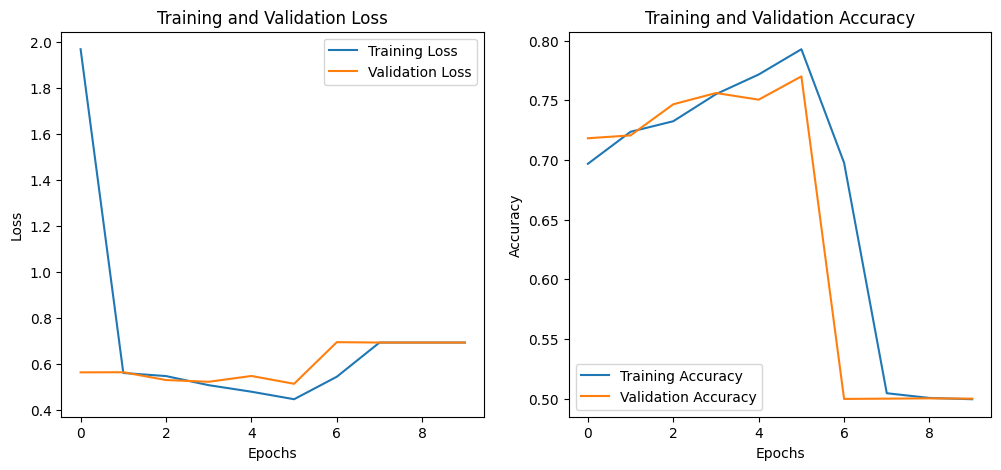

In [111]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [116]:
# Save the entire model
model.save('cnn_model.h5')

In [117]:
# Save the model in the recommended Keras format
model.save('my_model.keras')

In [120]:
# Save only the model weights
model.save_weights('cnn_model.weights.h5')